In [18]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Встановлення стилю для matplotlib для кращої візуалізації
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] 
plt.rcParams['axes.unicode_minus'] = False

In [4]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

In [5]:
# Імітація браузера для обходу 403 Forbidden Error
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

response = requests.get(url, headers=header)
df_list = pd.read_html(StringIO(response.text))

In [6]:
df = df_list[13]

# Встановлення "Регіон" як індексу
df = df.set_index('Регіон')

In [7]:
# Виведення перших рядків та розміру 
print("--- Первинний огляд (head та shape) ---")
print(df.head())
print(f"\nКількість рядків та стовпців (shape): {df.shape}")
print("-" * 30)

--- Первинний огляд (head та shape) ---
                   1950   1960   1970  1990  2000  2012 2014 2019
Регіон                                                           
Крим              230.0  206.0  160.0   130    73   126    —    —
Вінницька         224.0  192.0  142.0   124    84   112  109   76
Волинська         247.0  250.0  179.0   153   112   148  141  101
Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
Донецька          271.0  214.0  140.0   109    61    98   82    —

Кількість рядків та стовпців (shape): (28, 8)
------------------------------


In [8]:
# Заміна символу пропуску '—' на стандартний числовий NaN 
df.replace('—', np.nan, inplace=True)

In [9]:
# Перетворення всіх колонок на числовий тип float64 
# Використовуємо errors='coerce' для примусової конвертації
columns_to_convert = df.columns
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [10]:
# Використовуємо .iloc[:-1] для вибору всіх рядків, крім останнього
df = df.iloc[:-1]


In [11]:
print("\n--- Аналіз та заповнення пропусків ---")

missing_data_share = (df.isnull().sum() / len(df)) * 100
print("Частка пропусків у кожній колонці (%):")
print(missing_data_share)


--- Аналіз та заповнення пропусків ---
Частка пропусків у кожній колонці (%):
1950     7.407407
1960     3.703704
1970     3.703704
1990     0.000000
2000     0.000000
2012     0.000000
2014     7.407407
2019    14.814815
dtype: float64


In [12]:
# Замінюємо відсутні дані в стовпцях середніми значеннями цих стовпців (fillna)
df.fillna(df.mean(numeric_only=True), inplace=True)


In [13]:
print("\nПеревірка пропусків після fillna")
print(df.isnull().sum().sum())
print("-" * 30)


Перевірка пропусків після fillna
0
------------------------------


In [14]:
print("\n--- Аналіз та візуалізація ---")

# У якому регіоні була найвища народжуваність у 2014 році
region_max_2014 = df['2014'].idxmax()
value_max_2014 = df['2014'].max()
print(f"Найвища народжуваність у 2014: {value_max_2014} (Регіон: {region_max_2014})")


--- Аналіз та візуалізація ---
Найвища народжуваність у 2014: 148.0 (Регіон: Рівненська)


In [15]:
# Отримуємо список регіонів, де рівень народжуваності у 2019 році був вищим за середній
avg_2019 = df['2019'].mean()
regions_above_avg = df[df['2019'] > avg_2019].index.tolist()

print(f"\nСередній коефіцієнт народжуваності в Україні (2019): {avg_2019:.2f}")
print(f"Регіони з рівнем вищим за середній у 2019:")
print(regions_above_avg)



Середній коефіцієнт народжуваності в Україні (2019): 80.17
Регіони з рівнем вищим за середній у 2019:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


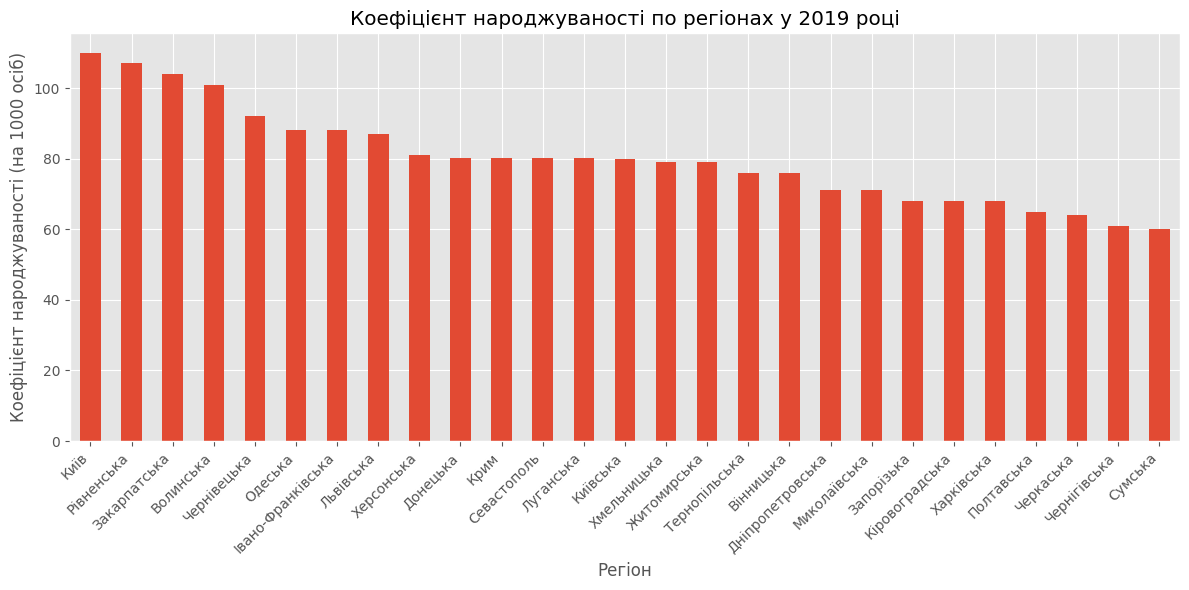

In [16]:
# Побудуємо стовпчикову діаграму народжуваності по регіонах у 2019 році 
df['2019'].sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(12, 6), 
    title='Коефіцієнт народжуваності по регіонах у 2019 році'
)
plt.ylabel('Коефіцієнт народжуваності (на 1000 осіб)')
plt.xticks(rotation=45, ha='right') # Поворот підписів для кращої читабельності
plt.tight_layout() # Налаштування відступів
plt.show() 

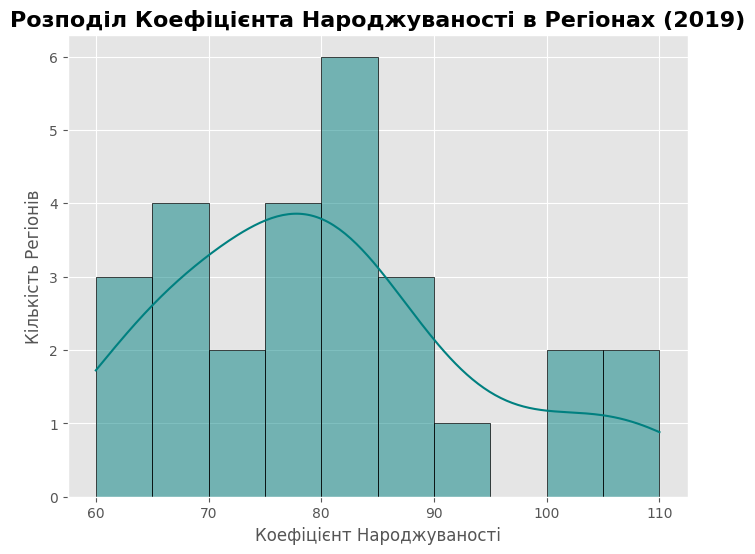

In [19]:
# --- Графік 2: Розподіл Народжуваності (Гістограма з KDE) ---
# Стиль: 'fivethirtyeight'

plt.figure(figsize=(8, 6))
# Використовуємо Seaborn distplot (histplot) для кращої візуалізації розподілу
sns.histplot(df['2019'], bins=10, kde=True, color='teal', edgecolor='black')

plt.title('Розподіл Коефіцієнта Народжуваності в Регіонах (2019)', fontsize=16, fontweight='bold')
plt.xlabel('Коефіцієнт Народжуваності', fontsize=12)
plt.ylabel('Кількість Регіонів', fontsize=12)
plt.style.use('fivethirtyeight')
plt.show()

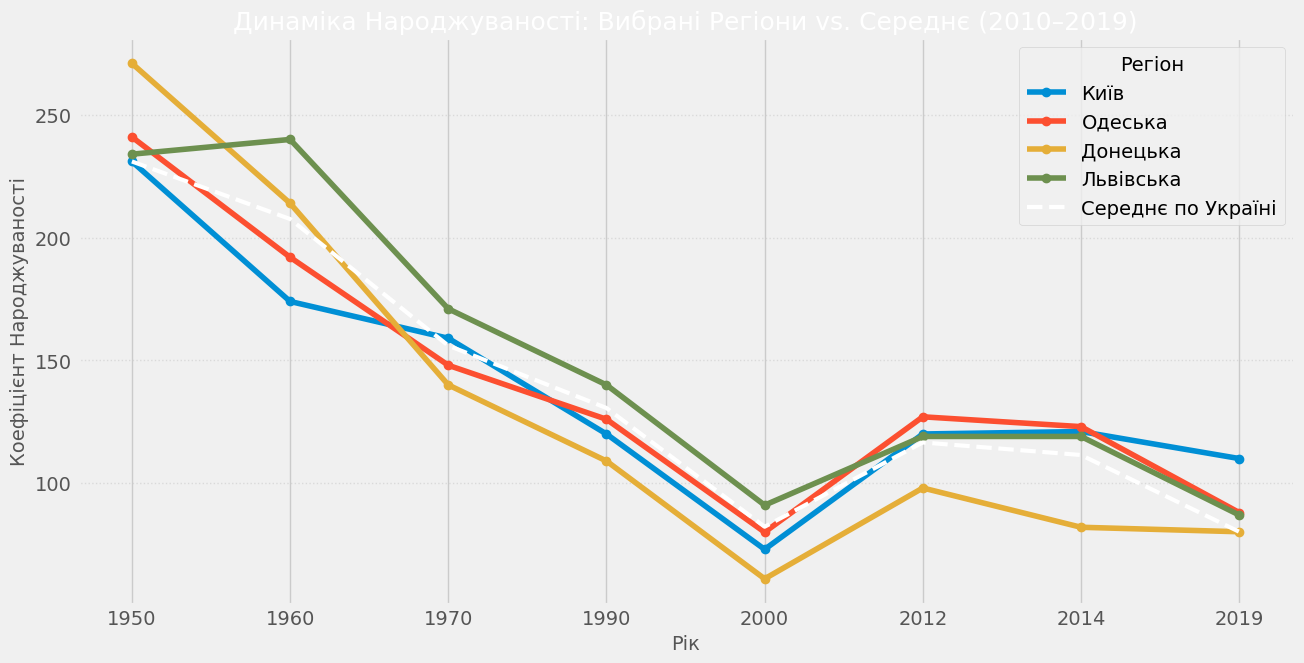

In [20]:
# --- Графік 3: Динаміка Народжуваності в Ключових Регіонах (Лінійний графік) ---
# Стиль: 'dark_background'

# Вибираємо регіони для порівняння динаміки (наприклад, найбільші + середнє)
regions_to_plot = ['Київ', 'Одеська', 'Донецька', 'Львівська']
df_dynamic = df.loc[regions_to_plot]

plt.figure(figsize=(14, 7))
# Транспонуємо для зручності: роки на осі X, регіони як лінії
df_dynamic.T.plot(ax=plt.gca(), marker='o', linestyle='-') 

# Додаємо середній показник по країні для порівняння
df.mean(numeric_only=True).plot(ax=plt.gca(), label='Середнє по Україні', color='white', linestyle='--', linewidth=3)


plt.title('Динаміка Народжуваності: Вибрані Регіони vs. Середнє (2010–2019)', fontsize=18, color='white')
plt.xlabel('Рік', fontsize=14)
plt.ylabel('Коефіцієнт Народжуваності', fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.legend(title='Регіон')
plt.style.use('dark_background') # Унікальний темний стиль
plt.show()